In [0]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.layers.core import Dense,Dropout,Activation,Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
data=pd.read_csv('/content/drive/My Drive/Data/hand_written_digit_train.csv')

In [4]:
Y_train=np.array(data['label'])
Y_train=keras.utils.to_categorical(Y_train,num_classes=10)
Y_train.shape

(42000, 10)

In [22]:
X_train=np.array(data.iloc[:,1:]).reshape(-1,28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [21]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
model=Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)               

In [36]:
for i in range(1):
  model.fit(X_train[:],Y_train[:])

Epoch 1/1
42000/42000 [==============================] - 28s 674us/step - loss: 1.8998 - acc: 0.8817


In [0]:
data_pr=pd.read_csv('/content/drive/My Drive/Data/hand_written_digit_test.csv')

(1, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


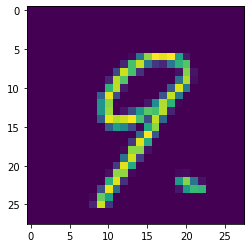

In [54]:
X_test=np.array(data_pr.iloc[2,:]).reshape(1,28,28,1)
print(X_test.shape)
print(model.predict(X_test))
plt.imshow(X_test[0,:,:,0])
plt.show()